# 説明

#  ニューラルネットワークの仕組み
ニューラルネットワークとは、人間の脳内にある神経細胞（ニューロン）とそのつながり、つまり神経回路網を人工ニューロンという数式的なモデルで表現したものである。  
ニューラルネットワークは、入力層、出力層、隠れ層から構成され、層と層の間には、ニューロン同士のつながりの強さを示す重み「W」がある。 

「人間の脳の中にあるニューロンは電気信号として情報伝達を行います。その際にシナプスの結合強度（つながりの強さ）によって、情報の伝わりやすさが変わってくる。この結合強度を、人工ニューロンでは重みWで表現する。
データが入力層のXに入ってくると、その値に重みW1をかけ、Yに結果を出力する。そして今度は、先ほど計算したYの値を入力として重みW2をかけ出力層のZに書き出す。重みW1およびW2の値によって出力結果は異なってくる。 


# バックプロパゲーションの仕組み  
ディープラーニングの学習では、ニューラルネットワークの入力層にデータを入力し重みをかけて出力するという操作を最終層までN回繰り返します。これをフォワード・プロパゲーションと呼ぶ。初期段階では、すぐに期待した通りの答えは出力されないため、正解ラベルと出力値の誤差をとり、誤差を各層に伝播させて正解値に近付くように各層の重みを調整する。この誤差を逆伝播させる事を「Back Propagation（バックプロパゲーション）」と呼ぶ


# 活性化関数の役割
活性化関数ではニューラルネットワークのニューロンが積算値を計算した値に、
その値を入力に非線形な関数を通して値を変換する関数である。

この活性化関数を利用することでニューロンの値を非線形にして表現力をあげたり、
あまりに大きすぎる値にすることを防いだり、出力をできるかぎり0にしたりして
学習させやく学習精度を向上させる役割等をさせることができる。


In [23]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# 保存先を指定
mnist_dir = "./mnist_data/"

# MNISTの読み込み
mnist = fetch_mldata('MNIST original', data_home=mnist_dir)
# trainとtestに分割する
X_train, X_test, y_train, y_test  = train_test_split(mnist.data, mnist.target, test_size=0.14285, shuffle=False)
# ラベルをint型にしておく
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


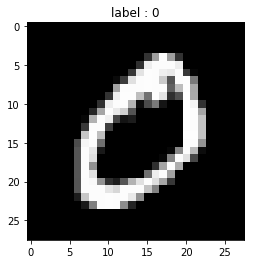

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


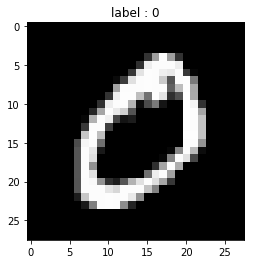

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [3]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image)

In [4]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) #

(60000,)
(60000, 10)
float64


In [6]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)または(n_samples,)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード

    Retruns
    ----------
    for文で呼び出すと以下の2つを返す。最後のイテレーションでは、バッチサイズより小さいこともある。
    mini_X : 次の形のndarray, shape (batch_size, n_features)
      学習データのミニバッチ
    mini_y : 次の形のndarray, shape (batch_size, 1)または(batch_size,)
      正解値のミニバッチ
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        # ランダムに並べ換える
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._counter = 0
        # イテレーション数を計算する
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        # len()が使われたときの処理
        return self._stop

    def __iter__(self):
        return self

    def __next__(self):
        # for文で呼ばれた際のループごとの処理
        if self._counter >= self._stop:
            # 最後まで進んだら終了
            self._counter = 0 # カウンターをリセット
            raise StopIteration()

        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [7]:
n_features = 784
n_node1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_node1)

In [40]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = True):
        self.verbose = verbose
        self.params = {}
        self.cost = []
        sigma = 0.01
        self.params['B1'] =  sigma * np.random.randn(400,)
        self.params['B2'] =  sigma * np.random.randn(200,)
        self.params['B3'] =  sigma * np.random.randn(10,)
        self.params['W1'] =  sigma * np.random.randn(784,400)
        self.params['W2'] =  sigma * np.random.randn(400,200)
        self.params['W3'] =  sigma * np.random.randn(200,10)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        n_features = 784
        n_node1 = 400
        sigma = 0.01 # ガウス分布の標準偏差
        

        gb = GetMiniBatch(X_train, y_train_one_hot ,batch_size=10)
        
        for mini_X_train, mini_y_train in gb:
            # このfor文内でミニバッチが使える
            #順伝播
  
            #出力
            A1= np.dot(mini_X_train, self.params['W1']) + self.params['B1'] 
            #活性化関数
            Z1 =  np.tanh(A1)
            #2層
            A2 = np.dot(Z1,self.params['W2'] ) +  self.params['B2']
            # 2層目の活性化関数
            #活性化関数
            Z2 =  np.tanh(A2)

            #3層
            A3 = np.dot(Z2,self.params['W3'] ) + self.params['B3'] 
            # 2層目の活性化関数
            #活性化関数
            Z3 = self.softmax(A3)

            #逆伝播

            #3層目
            delta1 = Z3 -mini_y_train 
            #delta1=(10,10)
            #(batch_size, n_output)となっている
            B3_grad = delta1


            W3_grad =np.dot(Z2.T,delta1)
            #W3_grad:(200, 10)となっている

            #2層目        

            delta2 = (1-self.tanh_back(A2)**2) * (np.dot(delta1,self.params['W3'].T))
            #delta2:(10, 200)
            B2_grad= delta2
            W2_grad =np.dot(Z1.T,delta2)

            #W2_grad:(400, 200)

            #1層目

            delta3 = (1-self.tanh_back(A1)**2) * (np.dot(delta2,self.params['W2'].T))

            #delta3:(10.400)
            B1_grad = delta3    
            W1_grad = np.dot(mini_X_train.T,delta3)
            #W１_grad(784,400となったことを確認)


            grads = {}
            #縦方向に平均をとる、スカラで返して計算
            grads['B3'] = np.average(B3_grad,axis=0)
            grads['B2'] = np.average(B2_grad,axis=0)
            grads['B1'] = np.average(B1_grad,axis=0)

            grads['W3'] = W3_grad
            grads['W2'] = W2_grad
            grads['W1'] = W1_grad

            for key in ('B3','B2','B1','W1','W2','W3'):

                self.params[key] -= 0.001 *  grads[key]
                loss = self.calc_cost(Z3,mini_y_train)
            self.cost.append(loss)

        return self.cost

        #バッチに対応した交差エントロピー誤差
    def calc_cost(self,y,t):
        if y.ndim ==2:
            
            t = t.reshape(1,t.size)
            y = y.reshape(1,y.size)

            batch_size = y.shape[0]

            return -np.sum(t * np.log(y+1e-7)) / batch_size
                                             
                                             
    def softmax(self,x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T

        x = x - np.max(x)
        return np.exp(x) / np.sum(np.exp(x))


    def tanh_back(self,x):
    
        return np.tanh(x)**2                                   

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        # 1層目  
        rayer1_pre = np.dot(X, self.params['W1']) + self.params['B1']
        rayer1_out = np.tanh(rayer1_pre)

        # 2層目  
        rayer2_pre = np.dot(rayer1_out, self.params['W2']) + self.params['B2']
        rayer2_out = np.tanh(rayer2_pre)

        # 3層目 
        rayer3_pre = np.dot(rayer2_out, self.params['W3'])+ self.params['B3']
        rayer3_out = self.softmax(rayer3_pre)
        
        rayer3_out = np.argmax(rayer3_out, axis=1)

        #print(rayer3_out)
        #print("rayer3_outのシェイプ　　：　　　",rayer3_out.shape)
        
        return rayer3_out

In [41]:
model = ScratchSimpleNeuralNetrowkClassifier()

In [42]:
cost= model.fit(X_train,y_train_one_hot)

In [43]:
print(cost)

[23.137915455254866, 23.08398012605439, 23.201709054093474, 22.845466201318853, 23.152125562615794, 22.884439355323984, 22.994916988529457, 22.953231830839584, 22.81054755209045, 22.868672940788944, 22.885474752219913, 22.488766446880106, 22.680300702491326, 22.68264346676035, 22.64047472611854, 22.354930537155827, 22.975382773665352, 22.85623733866431, 22.398742231715588, 22.537772298240835, 22.343952606040787, 22.527423548823286, 22.419765945436204, 22.384777777050225, 22.320812863465303, 22.61485077496312, 22.431966390737607, 21.9478309586512, 22.334597296809353, 22.555322980836152, 22.329316149470024, 22.32280507831054, 21.948283357313247, 22.424038785543658, 22.077128900648823, 21.95026767190846, 22.25468463986148, 21.70854199709649, 22.301811009505982, 21.542097780143738, 22.219031672060062, 21.955988120960765, 21.707728399547463, 21.999941311315673, 22.138004651214715, 21.837858892680146, 22.239036682753394, 21.789180287639496, 21.554598630611448, 22.065907910784077, 21.70377490

#  予測 

In [45]:
y_pred2 = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.7587

In [ ]:
# 

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


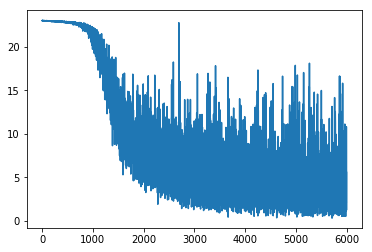

In [19]:
plt.plot(cost)